<a href="https://colab.research.google.com/github/Viroslav/CV_Chess_project/blob/main/CV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
from skimage.transform import rescale, ProjectiveTransform, warp
import pickle
import numpy as np
import pandas as pd
import random
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np
import pandas as pd
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import io
from skimage.feature import canny
import cv2
import imutils
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset, DataLoader

import random
from pathlib import Path
import warnings
import os
import torch
from torchvision import transforms
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

from sklearn.preprocessing import LabelEncoder
import torch.nn as nn
from tqdm import tqdm, tqdm_notebook


np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True


%matplotlib inline
from matplotlib import colors, pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! unzip drive/MyDrive/game.zip /drive/MyDrive/game

unzip:  cannot find or open drive/MyDrive/game.zip, drive/MyDrive/game.zip.zip or drive/MyDrive/game.zip.ZIP.


In [ ]:
import cv2
def show(img, cmap='gray'):
    """
    function to plot image
    """
    
    plt.figure(figsize=(14,8))
    plt.imshow(img, cmap=cmap)
    #plt.axis('off')
    plt.show()

In [ ]:
data_path = '/content/drive/MyDrive/chess'

In [ ]:
import os
images = {}

for img in os.listdir('/content/drive/MyDrive/game'):
    if img[-4:] == '.JPG':
        print(f' Loading: {img}')
        images[img]  = cv2.cvtColor(cv2.imread(f'/content/drive/MyDrive/game/{img}'), cv2.COLOR_RGB2GRAY)
print('Completed')

 Loading: IMG_3043.JPG
 Loading: IMG_3044.JPG
 Loading: IMG_3045.JPG
 Loading: IMG_3046.JPG
 Loading: IMG_3047.JPG
 Loading: IMG_3048.JPG
 Loading: IMG_3049.JPG
 Loading: IMG_3050.JPG
 Loading: IMG_3051.JPG
 Loading: IMG_3052.JPG
 Loading: IMG_3053.JPG
 Loading: IMG_3054.JPG
 Loading: IMG_3055.JPG
 Loading: IMG_3056.JPG
 Loading: IMG_3057.JPG
 Loading: IMG_3058.JPG
 Loading: IMG_3059.JPG
 Loading: IMG_3060.JPG
 Loading: IMG_3061.JPG
 Loading: IMG_3062.JPG
 Loading: IMG_3063.JPG
 Loading: IMG_3064.JPG
 Loading: IMG_3065.JPG
 Loading: IMG_3066.JPG
 Loading: IMG_3067.JPG
 Loading: IMG_3068.JPG
 Loading: IMG_3069.JPG
 Loading: IMG_3070.JPG
 Loading: IMG_3071.JPG
 Loading: IMG_3072.JPG
 Loading: IMG_3073.JPG
 Loading: IMG_3074.JPG
 Loading: IMG_3075.JPG
 Loading: IMG_3076.JPG
Completed


In [ ]:
images

{'IMG_3043.JPG': array([[205, 212, 206, ...,  23,  25,  12],
        [215, 212, 211, ...,  25,  19,  16],
        [219, 217, 224, ...,  27,  16,  16],
        ...,
        [207, 209, 210, ..., 221, 226, 225],
        [218, 216, 210, ..., 218, 220, 213],
        [211, 214, 218, ..., 214, 218, 217]], dtype=uint8),
 'IMG_3044.JPG': array([[193, 194, 194, ..., 202, 213, 204],
        [195, 196, 197, ..., 202, 203, 196],
        [194, 196, 196, ..., 203, 203, 210],
        ...,
        [ 70,  73,  77, ..., 211, 210, 204],
        [ 65,  67,  63, ..., 214, 212, 213],
        [ 73,  70,  71, ..., 212, 213, 213]], dtype=uint8),
 'IMG_3045.JPG': array([[ 79,  90,  84, ..., 204, 205, 206],
        [ 90,  89,  90, ..., 206, 206, 211],
        [ 88,  79,  80, ..., 206, 225, 212],
        ...,
        [223, 222, 223, ..., 225, 220, 223],
        [232, 226, 224, ..., 219, 220, 222],
        [234, 227, 227, ..., 222, 229, 219]], dtype=uint8),
 'IMG_3046.JPG': array([[ 28,  33,  36, ..., 225, 230, 229

In [ ]:
img_gray = images['IMG_3066.JPG']

In [ ]:
from ipywidgets import IntSlider, interact
sld1 = IntSlider(value=5, min=1, max=21, step=2, continuous_update=False)
sld2 = IntSlider(value=11, min=1, max=301, step=2, continuous_update=False)
sld3 = IntSlider(value=15, min=1, max=30, step=1, continuous_update=False)


def vary_thresh_parameters(kernel_size, size, C, use_cv2=False):
    if use_cv2:
        blurred = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), 0)
        show(cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, size, C))
    else:
        show(cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, size, C))

In [ ]:
interact(vary_thresh_parameters, kernel_size=sld1, size=sld2, C=sld3, use_cv2=True);

interactive(children=(IntSlider(value=5, continuous_update=False, description='kernel_size', max=21, min=1, st…

In [ ]:
blurred = cv2.GaussianBlur(img_gray, (21, 21), 0)
edges = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 75, 7)

<Figure size 900x600 with 0 Axes>

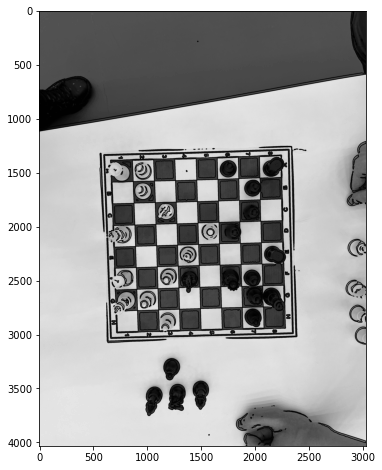

In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cnt = img_gray.copy()
cv2.drawContours(img_cnt, contours, -1, (3,3,3), 5)
plt.figure(dpi=150)
show(img_cnt)

In [ ]:
#we can compute area of each contour 
areas = (cv2.contourArea(cnt) for  cnt in contours)
#then exclude the first one = the whole image
areas = filter(lambda x: x[0] != 0, enumerate(areas))
#and select the largest one
cnt_id, area = max(areas, key=lambda x: x[1])
cnt_id, area

(387, 2315581.5)

In [ ]:

cnt = contours[cnt_id]
cnt = cv2.convexHull(cnt)

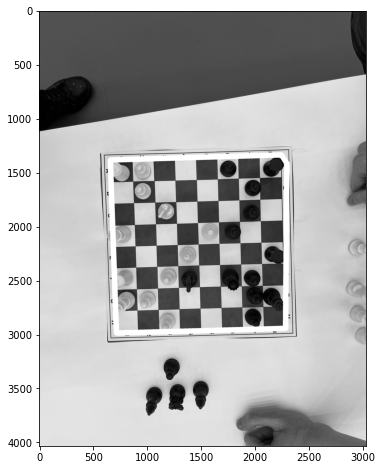

In [ ]:
img_1_cnt = img_gray.copy()
cv2.drawContours(img_1_cnt, [cnt], 0, (255,255,255), 50)

show(img_1_cnt)

In [ ]:
approx = cv2.approxPolyDP(cnt, 0.05*cv2.arcLength(cnt, True), True)

In [ ]:
approx

array([[[2242, 1334]],

       [[2279, 2940]],

       [[ 719, 2983]],

       [[ 661, 1382]]], dtype=int32)

In [ ]:
src = approx[::-1].reshape(4, 2)
if abs(src[0][0] - src[1][0]) > abs(src[0][0] - src[3][0]):
  src = np.vstack((src[3], src[:3]))

In [ ]:
dst = np.array([[0, 0],[0, 1350],[1350, 1350],[1350, 0]])
tform = ProjectiveTransform()
tform.estimate(dst, src)

warped = warp(img_gray, tform, output_shape=(1350,1350))

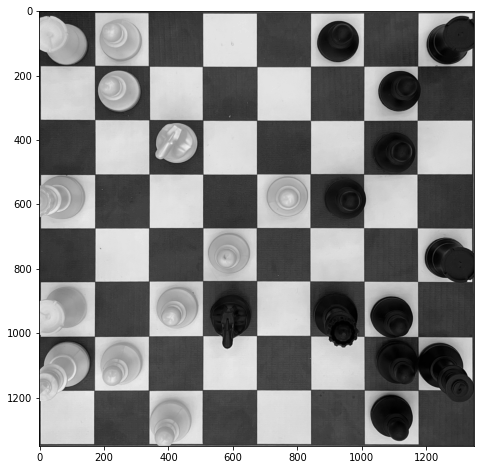

In [ ]:
show(warped)

In [ ]:
warped.max()

0.976898230934814

In [ ]:
warped.shape

(1350, 1350)

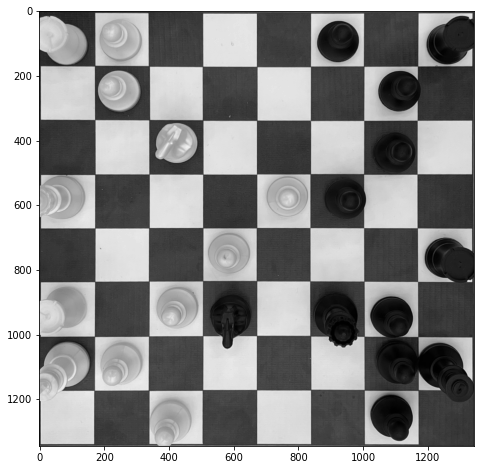

In [ ]:
from skimage.transform import resize
resized = {}
for i in range(1):
    image_resized = resize(warped, (1344, 1344), anti_aliasing=True)
    show(image_resized)
    resized[f'train_{i}.jpg'] = image_resized

In [ ]:
by_digits = {}
for photo in resized.keys():
    dig_list = []
    for i in range(168, 1345, 168):
        for j in range(168, 1345, 168):
            dig_list.append(resized[photo][(i-168):i, (j-168):j])
    by_digits[photo] = dig_list

In [ ]:
by_digits.keys()

dict_keys(['train_0.jpg'])

In [ ]:
def ploy_by_digits(by_digits):
    fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))
    plt.subplots_adjust(hspace=0.5)

    for i in range(len(by_digits)):
        axs[int(i / 8), i % 8].imshow(by_digits[i], cmap = 'gray')
    
    plt.show()

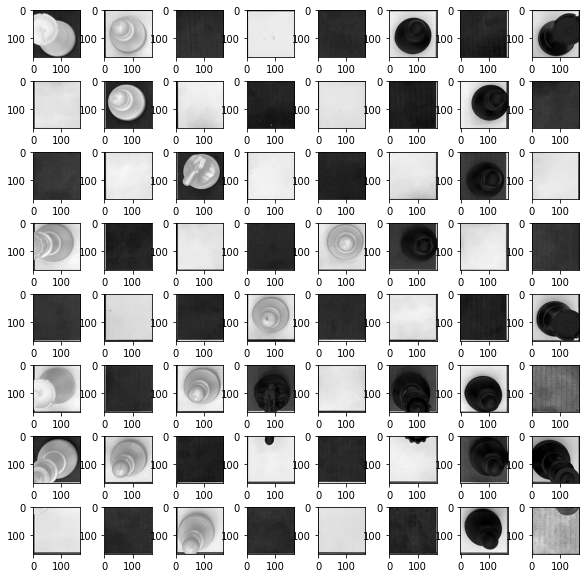

In [ ]:
ploy_by_digits(by_digits['train_0.jpg'])

In [ ]:
train_fig = np.array([[ 1,  3,  0, 13,  0,  4,  0,  2],
                      [13,  3, 13,  0, 13,  0,  4,  0],
                      [ 0, 13, 11, 13,  0, 13,  4, 13],
                      [ 7,  0, 13,  0,  3,  4, 13,  0],
                      [ 0, 13,  0,  3,  0, 13,  0,  2],
                      [ 1,  0,  3, 12, 13,  8,  4,  0],
                      [ 9,  3,  0, 13,  0, 13,  4, 10],
                      [13,  0,  3,  0, 13,  0,  4, 13]])

In [ ]:
i,train_ds = 0, {}
while i < 1:
    labels = train_fig.flatten()
    for j in range(64):
        if labels[j] in train_ds.keys():
            train_ds[labels[j]].append(by_digits[f'train_{i}.jpg'][j])
        else:
            lst = []
            train_ds[labels[j]] = [by_digits[f'train_{i}.jpg'][j]]
    i += 1

In [ ]:
img_gray47 = images['IMG_3047.JPG']

In [ ]:
blurred47 = cv2.GaussianBlur(img_gray47, (21, 21), 0)
edges47 = cv2.adaptiveThreshold(blurred47, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 75, 7)

<Figure size 900x600 with 0 Axes>

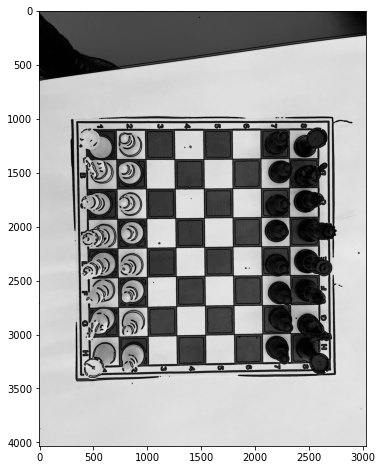

In [ ]:
contours, hierarchy = cv2.findContours(edges47, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cnt47 = img_gray47.copy()
cv2.drawContours(img_cnt47, contours, -1, (3,3,3), 5)
plt.figure(dpi=150)
show(img_cnt47)

In [ ]:
#we can compute area of each contour 
areas = (cv2.contourArea(cnt) for  cnt in contours)
#then exclude the first one = the whole image
areas = filter(lambda x: x[0] != 0, enumerate(areas))
#and select the largest one
cnt_id, area = max(areas, key=lambda x: x[1])
cnt_id, area
cnt = contours[cnt_id]
cnt = cv2.convexHull(cnt)

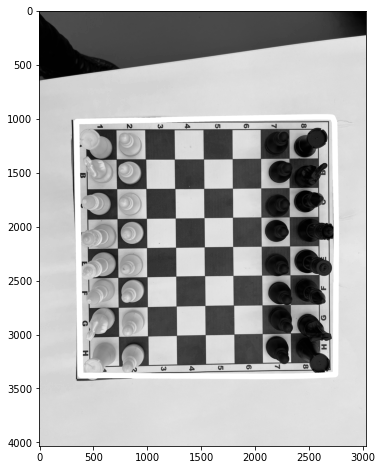

In [ ]:
img_1_cnt47 = img_gray47.copy()
cv2.drawContours(img_1_cnt47, [cnt], 0, (255,255,255), 50)

show(img_1_cnt47)

In [ ]:
approx = cv2.approxPolyDP(cnt, 0.05*cv2.arcLength(cnt, True), True)
src = approx[::-1].reshape(4, 2)
if abs(src[0][0] - src[1][0]) > abs(src[0][0] - src[3][0]):
  src = np.vstack((src[3], src[:3]))

In [ ]:
dst = np.array([[0, 0],[0, 1350],[1350, 1350],[1350, 0]])
tform = ProjectiveTransform()
tform.estimate(dst, src)

warped = warp(img_gray47, tform, output_shape=(1350,1350))

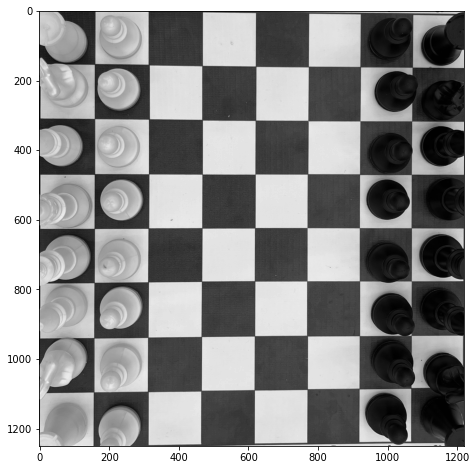

In [ ]:
show(warped[50:1300,50:1270])

In [ ]:
warped.shape

(1350, 1350)

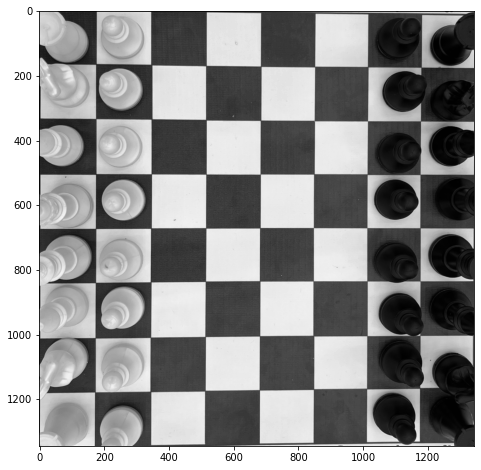

In [ ]:
from skimage.transform import resize
resized = {}
for i in range(1, 2):
    image_resized = resize(warped[50:1300,50:1270], (1344, 1344), anti_aliasing=True)
    show(image_resized)
    resized[f'train_{i}.jpg'] = image_resized

In [ ]:
for photo in resized.keys():
    dig_list = []
    for i in range(168, 1345, 168):
        for j in range(168, 1345, 168):
            dig_list.append(resized[photo][(i-168):i, (j-168):j])
    by_digits[photo] = dig_list

In [ ]:
by_digits.keys()

dict_keys(['train_0.jpg', 'train_1.jpg'])

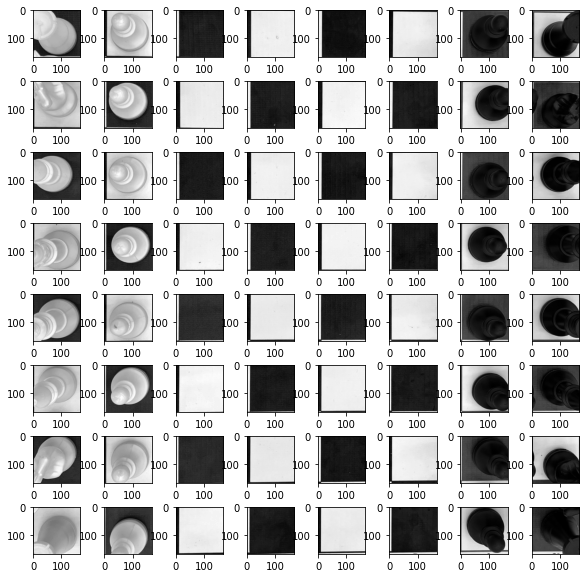

In [ ]:
ploy_by_digits(by_digits['train_1.jpg'])

In [ ]:
train_fig47 = np.array([[ 1,  3,  0, 13,  0, 13,  4,  2],
                        [11,  3, 13,  0, 13,  0,  4, 12],
                        [ 5,  3,  0, 13,  0, 13,  4,  6],
                        [ 7,  3, 13,  0, 13,  0,  4,  8],
                        [ 9,  3,  0, 13,  0, 13,  4, 10],
                        [ 5,  3, 13, 0,  13,  0,  4,  6],
                        [ 11, 3,  0, 13,  0, 13,  4, 12],
                        [ 1,  3, 13,  0, 13,  0,  4,  2]])

In [ ]:
i = 1
while i < 2:
    labels = train_fig47.flatten()
    for j in range(64):
        if labels[j] in train_ds.keys():
            train_ds[labels[j]].append(by_digits[f'train_{i}.jpg'][j])
        else:
            lst = []
            train_ds[labels[j]] = [by_digits[f'train_{i}.jpg'][j]]
    i += 1

## 76 картинка

In [ ]:
img_gray76 = images['IMG_3076.JPG']

In [ ]:
blurred76 = cv2.GaussianBlur(img_gray76, (21, 21), 0)
edges76 = cv2.adaptiveThreshold(blurred76, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 75, 7)

<Figure size 900x600 with 0 Axes>

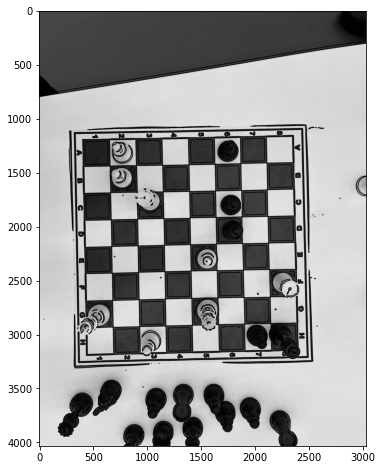

In [ ]:
contours, hierarchy = cv2.findContours(edges76, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cnt76 = img_gray76.copy()
cv2.drawContours(img_cnt76, contours, -1, (3,3,3), 5)
plt.figure(dpi=150)
show(img_cnt76)

In [ ]:
#we can compute area of each contour 
areas = (cv2.contourArea(cnt) for  cnt in contours)
#then exclude the first one = the whole image
areas = filter(lambda x: x[0] != 0, enumerate(areas))
#and select the largest one
cnt_id, area = max(areas, key=lambda x: x[1])
cnt_id, area
cnt = contours[cnt_id]
cnt = cv2.convexHull(cnt)

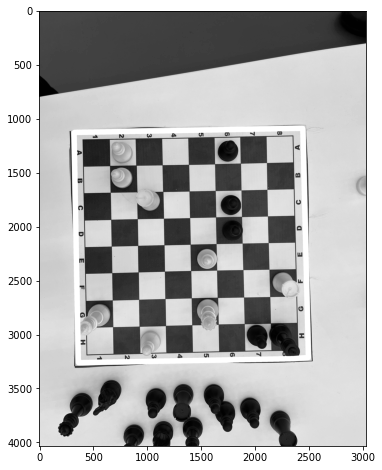

In [ ]:
img_1_cnt76 = img_gray76.copy()
cv2.drawContours(img_1_cnt76, [cnt], 0, (255,255,255), 50)

show(img_1_cnt76)

In [ ]:
approx = cv2.approxPolyDP(cnt, 0.05*cv2.arcLength(cnt, True), True)
src = approx[::-1].reshape(4, 2)
if abs(src[0][0] - src[1][0]) > abs(src[0][0] - src[3][0]):
  src = np.vstack((src[3], src[:3]))

In [ ]:
dst = np.array([[0, 0],[0, 1350],[1350, 1350],[1350, 0]])
tform = ProjectiveTransform()
tform.estimate(dst, src)

warped = warp(img_gray76, tform, output_shape=(1350,1350))

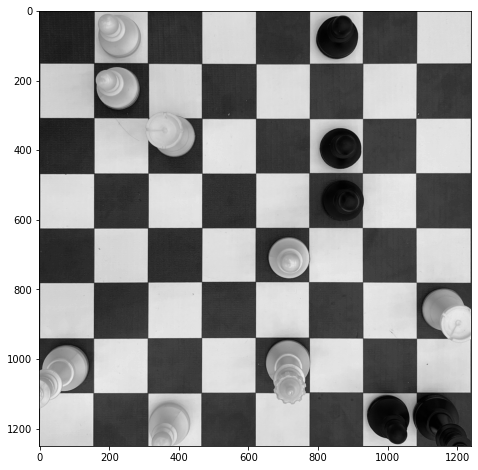

In [ ]:
show(warped[50:1300,50:1290])

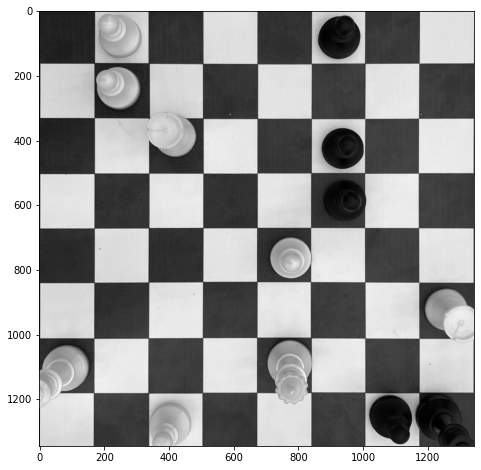

In [ ]:
from skimage.transform import resize
resized = {}
for i in range(2, 3):
    image_resized = resize(warped[50:1300,50:1290], (1344, 1344), anti_aliasing=True)
    show(image_resized)
    resized[f'train_{i}.jpg'] = image_resized

In [ ]:
for photo in resized.keys():
    dig_list = []
    for i in range(168, 1345, 168):
        for j in range(168, 1345, 168):
            dig_list.append(resized[photo][(i-168):i, (j-168):j])
    by_digits[photo] = dig_list

In [ ]:
by_digits.keys()

dict_keys(['train_0.jpg', 'train_1.jpg', 'train_2.jpg'])

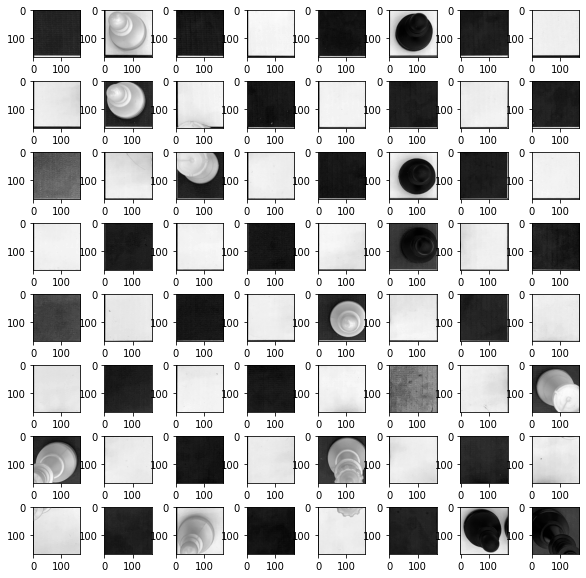

In [ ]:
ploy_by_digits(by_digits['train_2.jpg'])

In [ ]:
train_fig76 = np.array([[ 0,  3,  0, 13,  0,  4,  0, 13],
                        [13,  3, 13,  0, 13,  0, 13,  0],
                        [ 0, 13,  1, 13,  0,  4,  0, 13],
                        [13,  0, 13,  0, 13,  4, 13,  0],
                        [ 0, 13,  0, 13,  3, 13,  0, 13],
                        [13,  0, 13,  0, 13,  0, 13,  1],
                        [ 9, 13,  0, 13,  7, 13,  0, 13],
                        [13,  0,  3,  0, 13,  0,  4, 10]])

In [ ]:
i = 2
while i < 3:
    labels = train_fig76.flatten()
    for j in range(64):
        if labels[j] in train_ds.keys():
            train_ds[labels[j]].append(by_digits[f'train_{i}.jpg'][j])
        else:
            lst = []
            train_ds[labels[j]] = [by_digits[f'train_{i}.jpg'][j]]
    i += 1

## data_by_pictures

In [ ]:
data = {}
for i in range(0, 14, 1):
    print(len(train_ds[i]))
    data[i] = len(train_ds[i])

62
6
4
19
19
2
2
3
2
3
3
3
3
61


In [ ]:
data = pd.DataFrame(data = data.values(), index=data.keys(), columns=['count'])
data

,count
0,62
1,6
2,4
3,19
4,19
5,2
6,2
7,3
8,2
9,3


In [ ]:
from PIL import Image

In [ ]:
! rm -rf ./train

In [ ]:
try:
    os.mkdir(f"./train/")
except:
    pass

for k in train_ds.keys():
    for j in range(len(train_ds[k])):
        normed = (train_ds[k][j] - np.min(train_ds[k][j]))/(np.max(train_ds[k][j]) - np.min(train_ds[k][j]))
        im_to_save = Image.fromarray((normed*255).astype('uint8'))
        try:
            os.mkdir(f"./train/{k}")
        except:
            pass
        im_to_save.save(f"./train/{k}/{j}.jpg")

In [ ]:
mask = data['count'] < 150
data.loc[mask, 'to_add'] = (150 - data['count']).astype(int)
data.loc[~mask, 'to_add'] = 0
data['from_one_image'] = (np.ceil(data['to_add'] / data['count'])).astype(int)
data

,count,to_add,from_one_image
0,62,88,2
1,6,144,24
2,4,146,37
3,19,131,7
4,19,131,7
5,2,148,74
6,2,148,74
7,3,147,49
8,2,148,74
9,3,147,49


In [ ]:
augmenters = {
    'Crop': transforms.Compose([
                                transforms.Resize(size=150, max_size = 160),  #max_size=(30,30)),
                                transforms.CenterCrop(size=140),
                                transforms.RandomCrop(140)
                                ]),
    'Rotate': transforms.RandomRotation(degrees=(-90, 90))
}

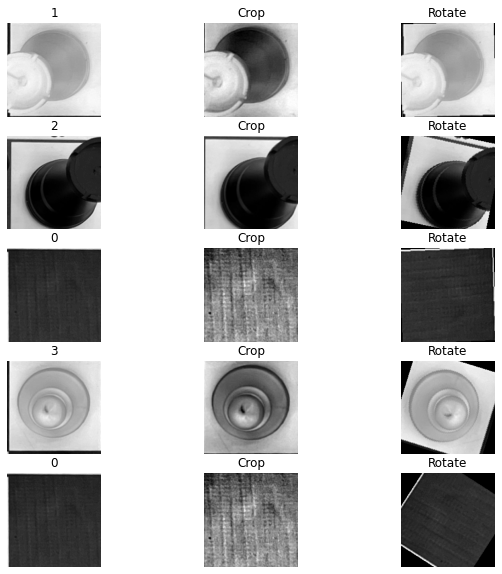

In [ ]:
n_examples = 5
train_dataset = train_ds

fig, ax = plt.subplots(nrows=n_examples, ncols=(len(augmenters) + 1),figsize=(10, 10))

for i in range(n_examples):
    key = int(np.random.uniform(0, 4))
    

    normed = (train_ds[key][key] - np.min(train_ds[key][key]))/(np.max(train_ds[key][key]) - np.min(train_ds[key][key]))
    img_orig = Image.fromarray((normed*255).astype('uint8'))

    img_label = key
    
    
    ax[i][0].imshow(img_orig, cmap='gray')
    ax[i][0].set_title(img_label)
    ax[i][0].axis('off')

    for j, (augmenter_name, augmenter) in enumerate(augmenters.items()):
        img_aug = augmenter(img_orig)
        ax[i][j + 1].imshow(img_aug, cmap='gray')
        ax[i][j + 1].set_title(augmenter_name)
        ax[i][j + 1].axis('off')

In [ ]:
i = 0
while i < 14:
    
    for h in range(data.to_add[i]):
        augmenter = random.choice(list(augmenters.values()))
        
        
        img = random.choice(train_ds[i])


        normed = (img - np.min(img))/(np.max(img) - np.min(img))
        img_orig = Image.fromarray((normed*255).astype('uint8'))
        
        
        aug_img = augmenter(img_orig)
        aug_img.save(f"./train/{i}/{h+data.iloc[i]['count']}.jpg")
        
    i += 1

## Dataloader

In [ ]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 168x168 px
RESCALE_SIZE = 168
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
class DigitDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
TRAIN_DIR = Path('./train')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.2, stratify=train_val_labels, random_state=42)

In [ ]:
val_dataset = DigitDataset(val_files, mode='val')

In [ ]:
class MyCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.05),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.linear = nn.Sequential(
            nn.Flatten(),
            nn.Linear(96*9, 96 * 5 * 5),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(96 * 5 * 5, 96 * 5 * 5),
            nn.ReLU(),
        )
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = self.linear(x)

#         x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [ ]:
def train(train_dataset, val_dataset, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"
    opt = torch.optim.AdamW(model.parameters())
    criterion = nn.CrossEntropyLoss()
    
    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            #print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = MyCnn(n_classes).to(DEVICE)
print(f"we will classify: {n_classes}")
print(simple_cnn)

we will classify: 14
MyCnn(
  (conv1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.05, inplace=False)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=

In [ ]:
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
train_val_labels = [path.parent.name for path in train_val_files]
train_files, _ = train_test_split(train_val_files, test_size=0.2, stratify=train_val_labels, random_state=42)

val_dataset = DigitDataset(val_files, mode='val')
    
train_dataset = DigitDataset(train_files, mode='train')

In [ ]:
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=8, batch_size=8)

epoch:  12%|█▎        | 1/8 [00:49<05:46, 49.53s/it]


Epoch 001 train_loss: 1.6680     val_loss 1.0637 train_acc 0.4042 val_acc 0.5905


epoch:  25%|██▌       | 2/8 [01:34<04:42, 47.01s/it]


Epoch 002 train_loss: 0.8255     val_loss 0.3954 train_acc 0.7208 val_acc 0.8429


epoch:  38%|███▊      | 3/8 [02:19<03:50, 46.01s/it]


Epoch 003 train_loss: 0.4672     val_loss 0.3067 train_acc 0.8512 val_acc 0.8857


epoch:  50%|█████     | 4/8 [03:29<03:41, 55.40s/it]


Epoch 004 train_loss: 0.3254     val_loss 0.1833 train_acc 0.8940 val_acc 0.9381


epoch:  62%|██████▎   | 5/8 [04:37<03:00, 60.05s/it]


Epoch 005 train_loss: 0.1308     val_loss 0.3166 train_acc 0.9625 val_acc 0.8762


epoch:  75%|███████▌  | 6/8 [05:45<02:05, 62.59s/it]


Epoch 006 train_loss: 0.2254     val_loss 0.1892 train_acc 0.9339 val_acc 0.9405


epoch:  88%|████████▊ | 7/8 [06:53<01:04, 64.48s/it]


Epoch 007 train_loss: 0.1451     val_loss 0.2462 train_acc 0.9655 val_acc 0.9381


epoch: 100%|██████████| 8/8 [08:00<00:00, 60.04s/it]


Epoch 008 train_loss: 0.2167     val_loss 0.1863 train_acc 0.9369 val_acc 0.9619


In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

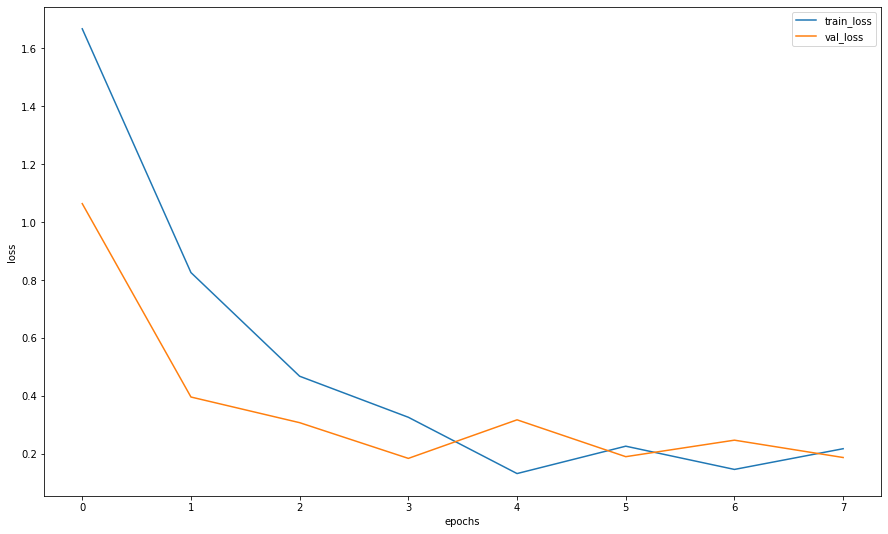

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best') 
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


In [ ]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,100))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(simple_cnn, ex_img.unsqueeze(0))

In [ ]:
probs_im

array([[1.0700713e-06, 2.0131304e-04, 9.9715827e-09, 9.9954259e-01,
        7.7889773e-08, 1.0172538e-05, 2.6226014e-06, 1.8968779e-04,
        2.6417822e-06, 1.4946233e-05, 1.5410031e-09, 1.4523728e-06,
        3.5476752e-08, 3.3462988e-05]], dtype=float32)

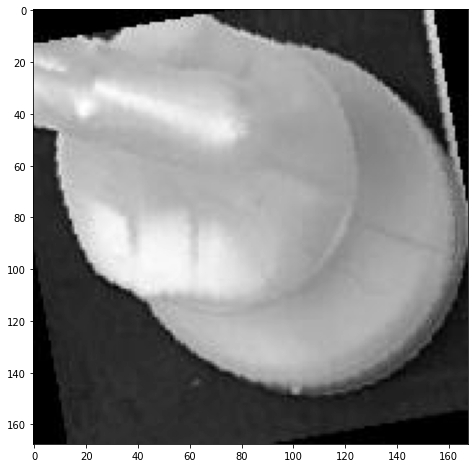

In [ ]:
show(ex_img[0])

In [ ]:
idxs = list(map(int, np.random.uniform(0,100, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(simple_cnn, imgs)

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))
print(label_encoder.classes_)

['0' '1' '10' '11' '12' '13' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

In [ ]:
actual_labels

[2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1]

In [ ]:
from sklearn.metrics import f1_score
print(actual_labels)
print(y_pred)
f1_score(actual_labels, y_pred,average='micro')

[2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1]
[2 0 0 2 2 2 2 0 7 0 2 2 1 0 1 1 2 2 2 1]


0.9500000000000001

In [ ]:
trans1 = transforms.ToTensor()

In [ ]:
k, j = 4, 0

#b = np.linalg.norm(train_ds[4][0])
#norm = train_ds[4][0] / (b + 1e-11)
#img_orig = Image.fromarray((norm*255).astype('uint8'))

normed = (train_ds[k][j] - np.min(train_ds[k][j]))/(np.max(train_ds[k][j]) - np.min(train_ds[k][j]))
img_orig = Image.fromarray((normed*255).astype('uint8'))

img_for_pred = img_orig.resize((RESCALE_SIZE, RESCALE_SIZE))
fr_pr = trans1(img_for_pred)

In [ ]:
k,j = 5, 1
normed = (train_ds[k][j] - np.min(train_ds[k][j]))/(np.max(train_ds[k][j]) - np.min(train_ds[k][j]))
img_orig = Image.fromarray((normed*255).astype('uint8'))
img_for_pred2 = img_orig.resize((RESCALE_SIZE, RESCALE_SIZE))


In [ ]:
fr_pr = trans1(img_for_pred2)

In [ ]:
fr_pr.shape

torch.Size([1, 168, 168])

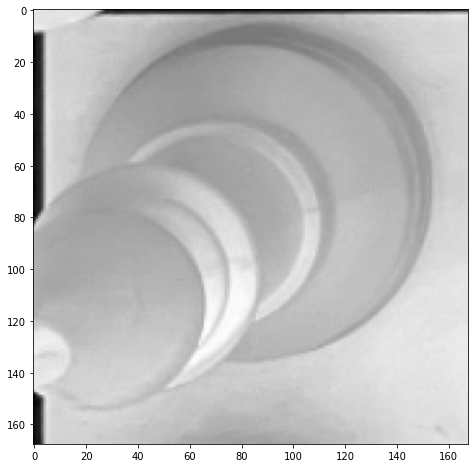

In [ ]:
show(fr_pr[0])

In [ ]:
probs_im = predict_one_sample(simple_cnn, fr_pr.unsqueeze(0))

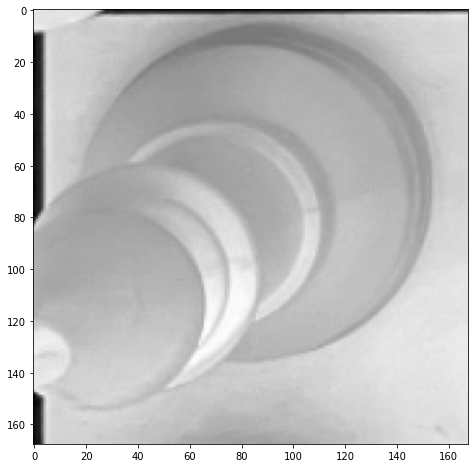

In [ ]:
show(fr_pr.unsqueeze(1)[0][0])

In [ ]:
probs_im

array([[1.50765140e-22, 3.82309380e-16, 6.63009042e-19, 9.95980218e-15,
        4.94849184e-15, 9.99999881e-01, 1.06766584e-16, 7.60913821e-08,
        7.63801425e-16, 1.90197658e-17, 8.16254962e-21, 1.96940189e-16,
        6.52336474e-20, 1.20395145e-20]], dtype=float32)

In [ ]:
y_pred = np.argmax(probs_im,-1)

In [ ]:
y_pred

array([5])

In [ ]:
preds_class = [label_encoder.classes_[i] for i in y_pred]

In [ ]:
preds_class

['13']

In [ ]:
! rm -rf ./test

In [ ]:
try:
    os.mkdir(f'./test')
except:
    pass
for j in range(3):
    try:
        os.mkdir(f'./test/train_{j}')
    except:
        pass
    i = 0
    while i < len(by_digits[f'train_{j}.jpg']):

        normed = (by_digits[f'train_{j}.jpg'][i] - np.min(by_digits[f'train_{j}.jpg'][i]))/(np.max(by_digits[f'train_{j}.jpg'][i]) - np.min(by_digits[f'train_{j}.jpg'][i]))
        img_orig = Image.fromarray((normed*255).astype('uint8'))
        
        img_orig.save(f"./test/train_{j}/{i/10}.jpg")
        i += 1

In [ ]:
TEST_DIR = Path('./test/train_2')
test_files = sorted(list(TEST_DIR.rglob('*.jpg')), reverse = False)

In [ ]:
test_dataset = DigitDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=1)
probs = predict(simple_cnn, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]

In [ ]:
int_pred = []
for i in range(len(preds)):
      int_pred.append(int(preds[i]))

In [ ]:
len(int_pred)

64

In [ ]:
digits = np.array(int_pred).reshape((1, 8, 8))

In [ ]:
digits.shape

(1, 8, 8)

In [ ]:
digits

array([[[ 0,  3,  0, 13,  0,  4,  0, 13],
        [13,  3, 13,  0, 13,  0, 13,  0],
        [ 0, 13,  1, 13,  0,  4,  0, 13],
        [13,  0, 13,  0, 13,  4, 13,  0],
        [ 0, 13,  0, 13,  3, 13,  0, 13],
        [13,  0, 13,  0, 13,  0, 13,  1],
        [ 9, 13,  0, 13,  7, 13,  0, 13],
        [13,  0,  3,  0, 13,  0,  4, 10]]])

In [ ]:
train_fig76

array([[ 0,  3,  0, 13,  0,  4,  0, 13],
       [13,  3, 13,  0, 13,  0, 13,  0],
       [ 0, 13,  1, 13,  0,  4,  0, 13],
       [13,  0, 13,  0, 13,  4, 13,  0],
       [ 0, 13,  0, 13,  3, 13,  0, 13],
       [13,  0, 13,  0, 13,  0, 13,  1],
       [ 9, 13,  0, 13,  7, 13,  0, 13],
       [13,  0,  3,  0, 13,  0,  4, 10]])

In [ ]:
digits == train_fig76

array([[[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]]])

In [ ]:
piece_dict = {
              '1':'R',     '2':'r',
              '3':'P',     '4':'p',
              '5':'B',   '6':'b',
              '7':'Q',    '8':'q',
              '9':'K',    '10':'k',
              '11':'N', '12':'n',
              '13':'white_empty',   '0':'black_empty',
              }

In [2]:
! pip install chess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 32.0 MB/s 


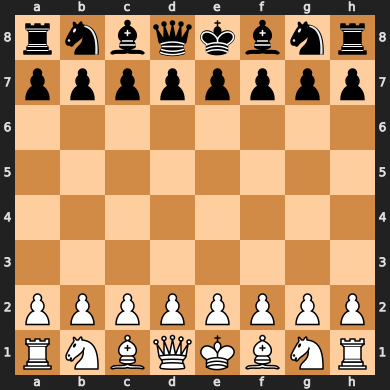

In [3]:
import chess

board = chess.Board()
board

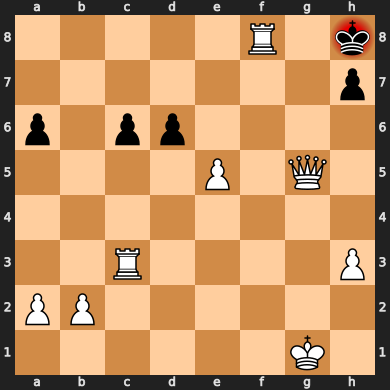

In [46]:
board = chess.Board("5R1k/7p/p1pp4/4P1Q1/8/2R4P/PP6/6K1 b ")
board

In [5]:
board.legal_moves

<LegalMoveGenerator at 0x7fcb118a53d0 ()>

In [6]:
board.is_stalemate()

False

In [7]:
board.is_insufficient_material()

False

In [8]:
board.outcome()

Outcome(termination=<Termination.CHECKMATE: 1>, winner=True)

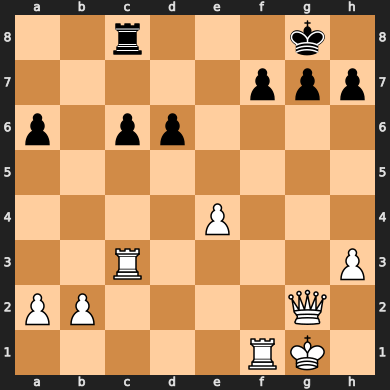

In [53]:
board = chess.Board("2r3k1/5ppp/p1pp4/8/4P3/2R4P/PP4Q1/5RK1 b")
board

In [54]:
list(board.legal_moves)[-7]

Move.from_uci('f7f6')

In [55]:
F6 = chess.Move.from_uci("f7f6")
board.push(F6)

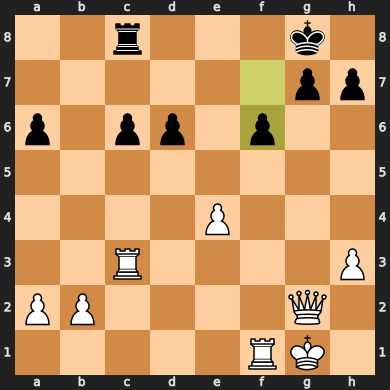

In [56]:
board